In [1]:
# Uncomment if you haven't installed mlxtend
# !pip install mlxtend

import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
# Sample dataset
dataset = [
    ['milk', 'bread', 'butter'],
    ['bread', 'butter'],
    ['milk', 'bread'],
    ['milk', 'bread', 'butter'],
    ['milk', 'butter']
]

# Convert to one-hot encoded DataFrame
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_data = te.fit_transform(dataset)
df = pd.DataFrame(te_data, columns=te.columns_)
df

,bread,butter,milk
0,True,True,True
1,True,True,False
2,True,False,True
3,True,True,True
4,False,True,True


In [3]:
# Find frequent itemsets with min support of 0.6
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.8,(bread)
1,0.8,(butter)
2,0.8,(milk)
3,0.6,"(bread, butter)"
4,0.6,"(bread, milk)"
5,0.6,"(milk, butter)"


In [4]:
# Generate rules with minimum confidence of 0.7
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
0,(bread),(butter),0.6,0.75,0.9375
1,(butter),(bread),0.6,0.75,0.9375
2,(bread),(milk),0.6,0.75,0.9375
3,(milk),(bread),0.6,0.75,0.9375
4,(milk),(butter),0.6,0.75,0.9375
5,(butter),(milk),0.6,0.75,0.9375


F:\ANACONDA\lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\ANACONDA\lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\ANACONDA\lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


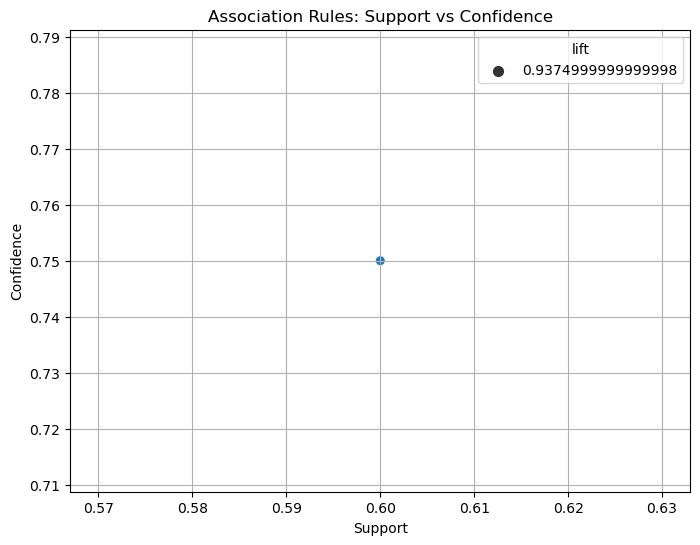

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x='support', y='confidence', size='lift', sizes=(50, 300), data=rules)
plt.title('Association Rules: Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid(True)
plt.show()